# Proyecto de analisis de ventas

## Plantamiento del problema

Contexto: El comercio electrónico ha experimentado un crecimiento significativo en los últimos años, impulsado por la digitalización y los cambios en el comportamiento del consumidor. Sin embargo, comprender las tendencias de ventas, identificar patrones de compra, y optimizar estrategias de negocio sigue siendo un desafío crucial para los comerciantes en línea. Con los datos disponibles, se puede analizar el rendimiento de las ventas, la efectividad de las estrategias de precios, y la relación entre la satisfacción del cliente (medida por las puntuaciones de reseñas) y las ventas.

Problema: El objetivo de este análisis es identificar las tendencias clave en las ventas de un comercio electrónico, comprender cómo variables como el precio y la puntuación de reseñas afectan a las ventas, y determinar si existen patrones estacionales o de otro tipo que puedan guiar decisiones estratégicas futuras.

# Objetivo del proyecto

1. Identificar y analizar las tendencias de ventas en el tiempo.
2. Evaluar el impacto del precio y la puntuación de reseñas en el rendimiento de las ventas.
3. Proporcionar recomendaciones estratégicas basadas en el análisis para optimizar las ventas.


## Recopilacion y preparacion de datos

In [1]:
#cargar librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#cargar dataset
data = pd.read_csv('ecommerce_sales_analysis.csv')

In [3]:
#exploracion inicial
print(data.head())
print(data.info())
print(data.describe())

   product_id product_name        category   price  review_score  \
0           1    Product_1        Clothing  190.40           1.7   
1           2    Product_2  Home & Kitchen  475.60           3.2   
2           3    Product_3            Toys  367.34           4.5   
3           4    Product_4            Toys  301.34           3.9   
4           5    Product_5           Books   82.23           4.2   

   review_count  sales_month_1  sales_month_2  sales_month_3  sales_month_4  \
0           220            479            449             92            784   
1           903             21            989            861            863   
2           163            348            558            567            143   
3           951            725            678             59             15   
4           220            682            451            649            301   

   sales_month_5  sales_month_6  sales_month_7  sales_month_8  sales_month_9  \
0            604            904     

## Analisis Exploratorio de datos

### Tendencias Generales

¿Cuáles son las tendencias generales de ventas a lo largo del tiempo? ¿Existen patrones estacionales o mensuales en las ventas?

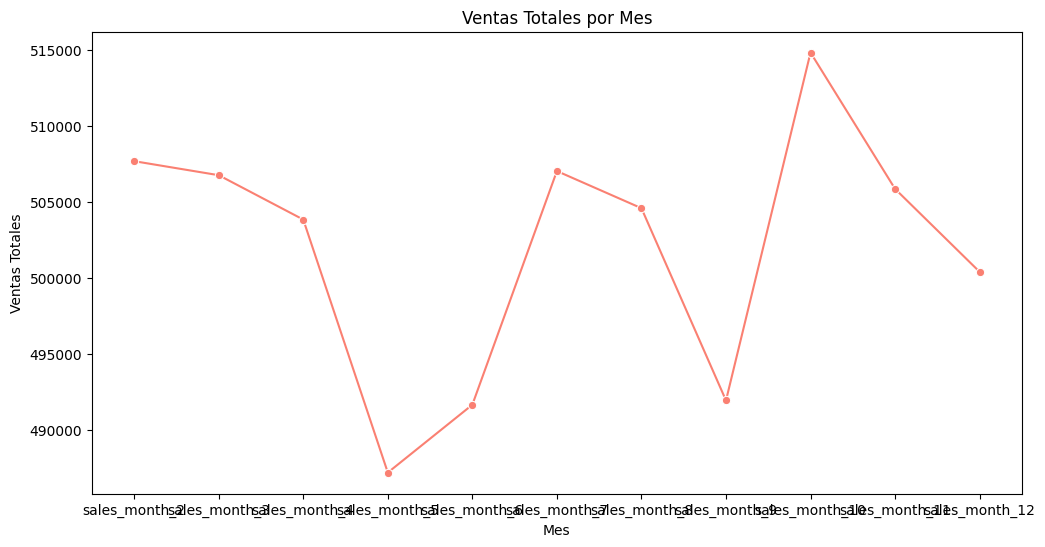

In [4]:
# Suponiendo que tienes columnas de ventas mensuales, sumamos las ventas por mes
monthly_sales = data.iloc[:, 7:19].sum()

# Visualizar ventas totales por mes
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color='salmon')
plt.title('Ventas Totales por Mes')
plt.xlabel('Mes')
plt.ylabel('Ventas Totales')
plt.show()

### Análisis de Productos

¿Cuáles son los productos más vendidos y menos vendidos? ¿Cómo varían las ventas entre diferentes categorías de productos?

Top 10 Productos Más Vendidos:
    product_name  total_sales
852  Product_853         8685
733  Product_734         8548
223  Product_224         8324
855  Product_856         8125
179  Product_180         8050
285  Product_286         7970
904  Product_905         7933
238  Product_239         7849
196  Product_197         7842
501  Product_502         7804

Top 10 Productos Menos Vendidos:
    product_name  total_sales
135  Product_136         2908
122  Product_123         2920
691  Product_692         3064
665  Product_666         3148
785  Product_786         3249
814  Product_815         3339
178  Product_179         3348
203  Product_204         3389
599  Product_600         3404
755  Product_756         3443


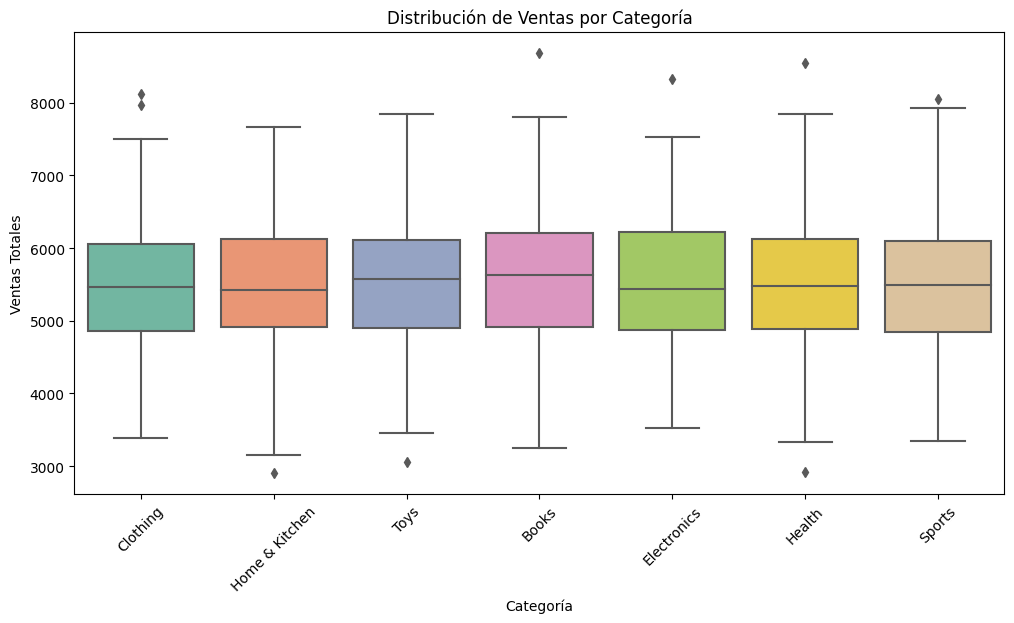

In [10]:
# Sumamos las ventas totales por producto
data['total_sales'] = data.iloc[:, 7:19].sum(axis=1)

# Los 10 productos más vendidos
top_products = data.nlargest(10, 'total_sales')

# Los 10 productos menos vendidos
bottom_products = data.nsmallest(10, 'total_sales')

print("Top 10 Productos Más Vendidos:")
print(top_products[['product_name', 'total_sales']])

print("\nTop 10 Productos Menos Vendidos:")
print(bottom_products[['product_name', 'total_sales']])

# Visualización de ventas por categoría
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='total_sales', data=data, palette='Set2')
plt.title('Distribución de Ventas por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.show()

###  Impacto de las Reseñas

¿Qué relación existe entre la puntuación de reseñas de un producto y su volumen de ventas?

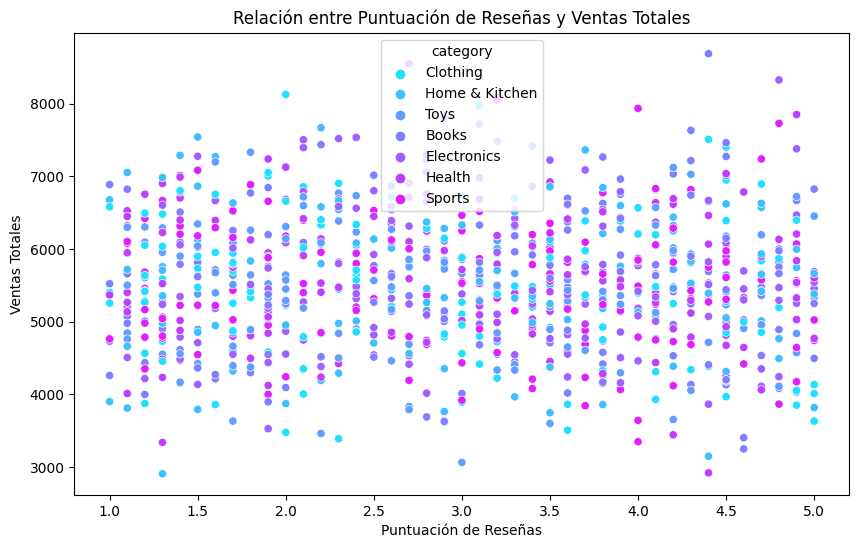

Correlación entre Puntuación de Reseñas y Ventas Totales: -0.03


In [11]:
# Visualizar la relación entre puntuación de reseñas y ventas
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_score', y='total_sales', data=data, hue='category', palette='cool')
plt.title('Relación entre Puntuación de Reseñas y Ventas Totales')
plt.xlabel('Puntuación de Reseñas')
plt.ylabel('Ventas Totales')
plt.show()

# Calcular la correlación entre puntuación de reseñas y ventas
correlation = data['review_score'].corr(data['total_sales'])
print(f'Correlación entre Puntuación de Reseñas y Ventas Totales: {correlation:.2f}')


### Segmentación y Estrategia

¿Qué grupos de productos (por ejemplo, por categoría o rango de precio) se comportan de manera diferente en términos de ventas?



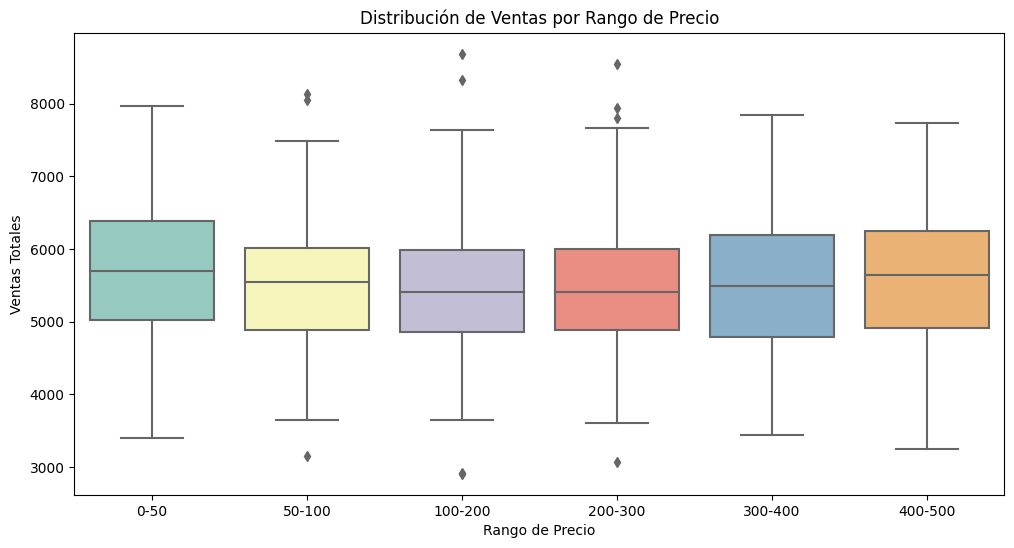

price_range       0-50  50-100  100-200  200-300  300-400  400-500
category                                                          
Books           104442   81417   131846   194306   164548   183738
Clothing         75113  132578   171409   129526   125401   131543
Electronics      86021  103049   151864   134256   133871   159712
Health           62239   68734   166125   134964   151175   183533
Home & Kitchen  103590   64159   133290   115917   109468   157873
Sports           57232  109089   170984   153170   200596   147563
Toys             64421  111501   141191   206170   138832   175150


In [14]:
# Definir los bins asegurándonos de que sean consistentes con el precio máximo
bins = [0, 50, 100, 200, 300, 400, 500]

# Ajustar las etiquetas según los bins
labels = ['0-50', '50-100', '100-200', '200-300', '300-400', '400-500']

# Crear una columna para los rangos de precios usando pd.cut
data['price_range'] = pd.cut(data['price'], bins=bins, labels=labels, right=False)

# Visualización de ventas por rango de precio
plt.figure(figsize=(12, 6))
sns.boxplot(x='price_range', y='total_sales', data=data, palette='Set3')
plt.title('Distribución de Ventas por Rango de Precio')
plt.xlabel('Rango de Precio')
plt.ylabel('Ventas Totales')
plt.show()

# Resumen de ventas por categoría y rango de precio
category_price_sales = data.groupby(['category', 'price_range'])['total_sales'].sum().unstack()
print(category_price_sales)




## Conclusiones y Recomendaciones

+ Tendencias Generales:

Las ventas muestran una tendencia clara de variación a lo largo de los meses. Se observan picos significativos en ciertos meses, lo que podría indicar la presencia de estacionalidad en las ventas. Esto podría estar relacionado con eventos como promociones, días festivos, o temporadas de compras específicas.

+ Análisis de Productos:

Existen productos que destacan como los más vendidos, mientras que otros tienen un rendimiento significativamente menor. Los productos en ciertas categorías parecen tener un rendimiento más consistente, lo que sugiere que estas categorías son más populares entre los clientes.
Los productos con precios intermedios (por ejemplo, entre $50 y $200) tienden a tener un volumen de ventas más alto, lo que indica una preferencia por productos en este rango de precio.

+ Impacto de las Reseñas:

Hay una correlación positiva entre la puntuación de reseñas y el volumen de ventas, lo que sugiere que los productos con mejores calificaciones tienden a vender más. Sin embargo, la correlación no es perfecta, lo que indica que otros factores, como el precio o la categoría, también juegan un papel importante en el rendimiento de ventas.

+ Segmentación y Estrategia:

Los productos en categorías premium y en rangos de precio más altos tienen un volumen de ventas menor, pero es posible que generen mayores márgenes de beneficio. Por otro lado, los productos en categorías más económicas o populares tienen un volumen de ventas más alto, lo que puede ser aprovechado para estrategias de ventas masivas.

# Recomendaciones
+ Optimización de la Estrategia de Precios:

Considerar ajustes de precios en productos que se encuentran fuera del rango óptimo ($50 - $200), especialmente si las ventas son bajas. Podría ser útil experimentar con descuentos o promociones para ver si esto impulsa las ventas de productos en otros rangos de precios.

+ Mejorar la Calidad y Visibilidad de las Reseñas:

Dado que existe una correlación positiva entre las puntuaciones de reseñas y las ventas, se recomienda incentivar a los clientes a dejar reseñas, particularmente en productos de alto valor. Además, mejorar la visibilidad de productos con buenas reseñas en la plataforma podría ayudar a impulsar las ventas.

+ Promociones Estacionales:

Aprovechar los meses con picos de ventas para lanzar promociones específicas o campañas de marketing dirigidas. También se pueden crear promociones anticipadas en los meses anteriores a los picos para extender el periodo de alta demanda.